# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
#importing warnings 
import warnings 
warnings.filterwarnings('ignore')

# 1.1 Reading and Understanding of the Dataset

In [3]:
#Reading the csv file using the pandas 
bike_df=pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking the rows and columns 
bike_df.shape

(730, 16)

In [5]:
#Info of the datatypes and null values 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Describing the data 
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Checking the columns of the data
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#checking the size of the data 
bike_df.size

11680

In [9]:
#Chceking the Values of the data 
bike_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

# 1.2 Checking the Duplicate and Null values 

In [10]:
# Missing Value percentagwe in each column 
round(100*(bike_df.isnull().sum()/len(bike_df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [11]:
# row-wise checking the null count in the data 
round((bike_df.isnull().sum(axis=1)/len(bike_df))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

From here we can see that there are no null values present in the data. 

In [12]:
#Checking the Duplicates in the data 
bike_df_duplicate = bike_df.copy()
bike_df_duplicate.drop_duplicates(subset=None, inplace=True)

In [13]:
#Checking using shape function 
bike_df_duplicate.shape 

(730, 16)

Insights:
1) After running the duplicate command the shape is found to be same as of the original dataframe.

2) So we can conclude that there were zero duplicates which are found to be in the dataset. 

# 1.3 Data Cleaning 

Dropping the unwanted columns which is not useful for analysis. 

In [14]:
#We also need to know how the bussiness is old so we are introducing the days_old variable 
bike_df['days_old'] = (pd.to_datetime(bike_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [15]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [16]:
# Droping instant column as it is index column 
bike_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday
bike_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column 

bike_df.drop(['casual'], axis = 1, inplace = True)
bike_df.drop(['registered'], axis = 1, inplace = True)

In [17]:
#Inspecting the column 
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


# Reason for Removing Unwanted Columns 

Based on the data we have removed some columns for further analysis of the data:- 
1) instant- It is only the index value of the dataset. 

2) dteday- This has the date, as we already have the columns of 'year' and 'month', hence this column is not needed. 

3) casual and registered - Both these columns contains the count of bike booked by different categories of customers. Since, our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. Moreover, we have created a new variable to have the ratio of these customer types.

In [18]:
#Now we will see the correlation between variables
bike_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


# Handling Outliers in the Data 

In [19]:
#Checking the columns of the dataset 
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [20]:
# Checking all the unique values in the column 
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

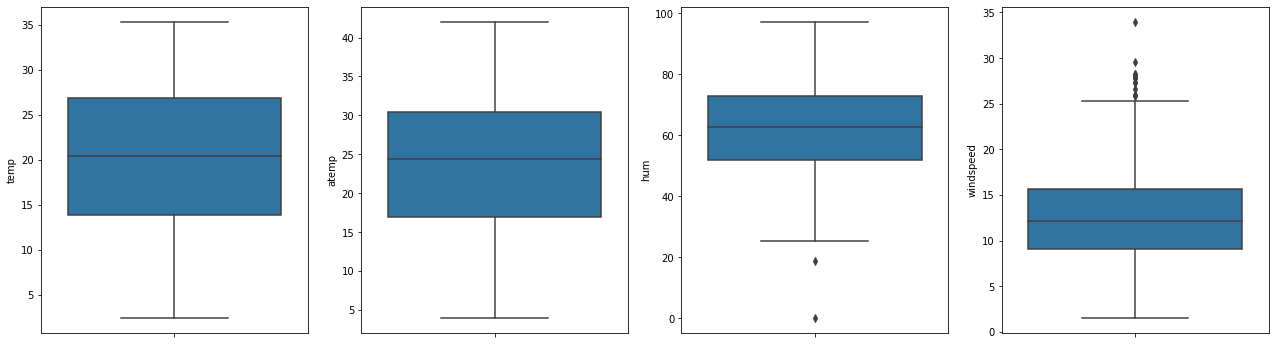

In [21]:
#Using the Boxplot for independent variables for continous values 
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(22,6))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df)
    i+=1

From this we can conclude that there are no outliers which needs to be handeled on the dataset. 

# Splitting of the Data 

We will use the train and test method for splitting the data , keeping the ratio (70:30) 

In [22]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.70, test_size = 0.30, random_state = 100)

In [23]:
df_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [24]:
# Verifying the info and dataframe after using the split 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      510 non-null    int64  
 1   yr          510 non-null    int64  
 2   mnth        510 non-null    int64  
 3   holiday     510 non-null    int64  
 4   weekday     510 non-null    int64  
 5   workingday  510 non-null    int64  
 6   weathersit  510 non-null    int64  
 7   temp        510 non-null    float64
 8   atemp       510 non-null    float64
 9   hum         510 non-null    float64
 10  windspeed   510 non-null    float64
 11  cnt         510 non-null    int64  
 12  days_old    510 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 55.8 KB


In [25]:
df_train.shape

(510, 13)

In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      219 non-null    int64  
 1   yr          219 non-null    int64  
 2   mnth        219 non-null    int64  
 3   holiday     219 non-null    int64  
 4   weekday     219 non-null    int64  
 5   workingday  219 non-null    int64  
 6   weathersit  219 non-null    int64  
 7   temp        219 non-null    float64
 8   atemp       219 non-null    float64
 9   hum         219 non-null    float64
 10  windspeed   219 non-null    float64
 11  cnt         219 non-null    int64  
 12  days_old    219 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 24.0 KB


In [27]:
df_test.shape

(219, 13)

# 2.1 Exploratory Data Analysis of Dataset 

<Figure size 1080x2160 with 0 Axes>

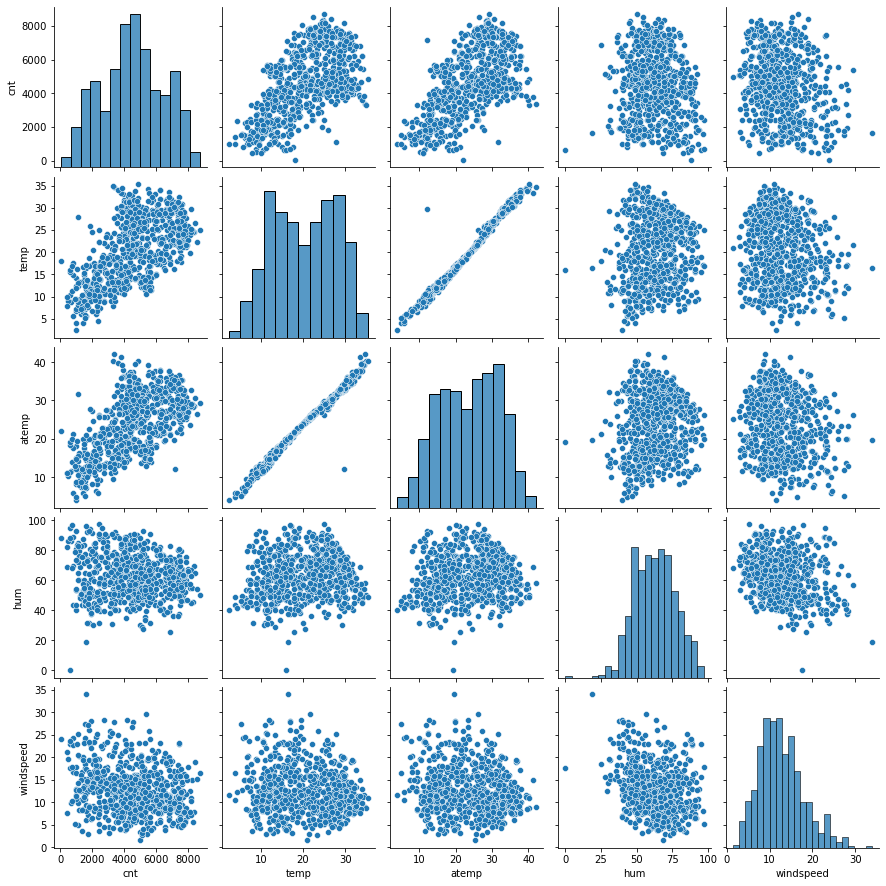

In [28]:
# Using the pairplot to check the linear relationship 
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

From the above pairplots we can see that the temp and atemp has the linear relationship with the target variable cnt. 

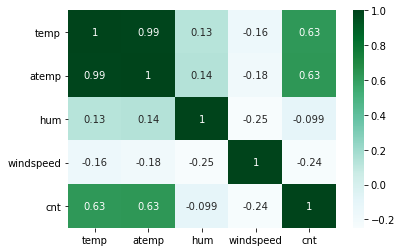

In [29]:
# Continuous variables and its relationship with each other
sns.heatmap(bike_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

Here we can see that the temp and atemp has around .99 means almost 1 which means it is highly corelated. 

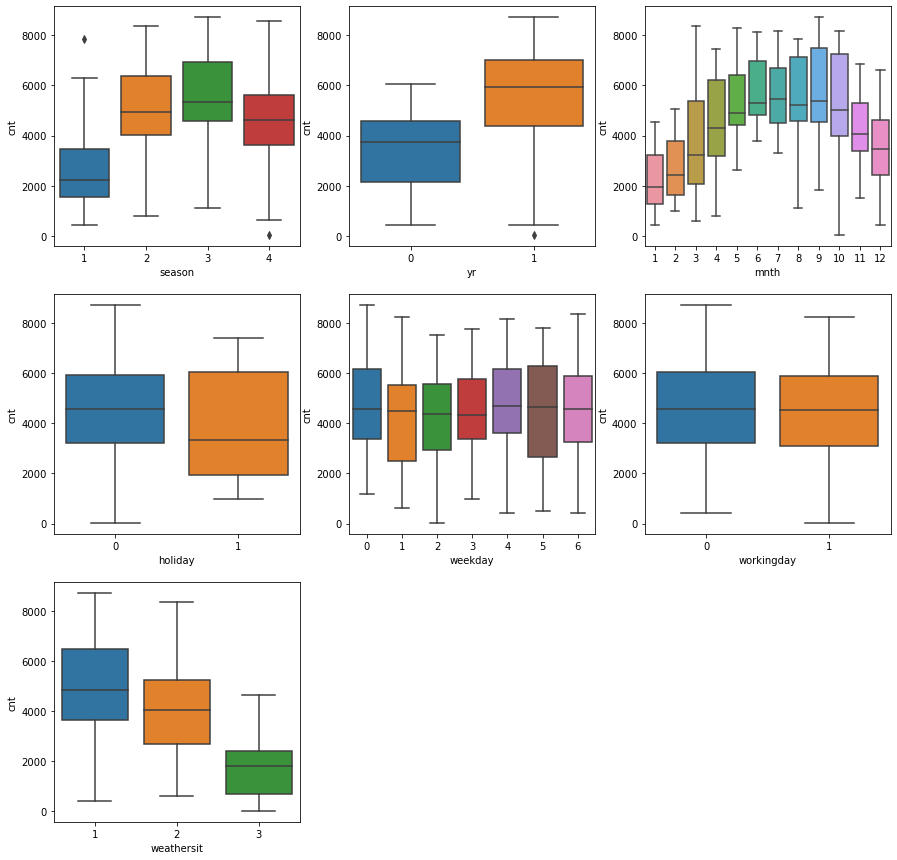

In [30]:
#Visualising the Categorical Variables 
vars_categorical = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_categorical):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_df, x=i[1], y='cnt')
plt.show()

Insights of the Dataset : 
There are total 7 categorical variables which is present in the dataset:- 
1) season - From the above data it is seen almost 32% of the bike bookings which happened in season 3 with the median of having 5000 bookings which was for the period of two years. 27% and 25% bookings were happened in season 2 and season 4 respectively. This clearly states that season can be one of the good indicators. 

2) yr- The demand for the bike booking has grown more in the forthcoming year. 

3) mnth- Almost good amount of booking were happened in the months of 5,6,7,8 and 9 which shows a greater increase in demand of bikes and so henceforth mnth can be descibed as a good predictor for the dependant variable.

4) holiday - More than 90% of the booking has occurred when there is no holiday which clearly indicate that the demand has drastically decreased during holiday period. 

5) weekday- Weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor.

6) workingday - Approximately 70% of the bike bookings have happened in the workingdays in the 2 year periods of time , this shows that it is the good predictor for dependant variable. 

7) weathersit - When the weathersit is clear the demand for the booking is high, during the end year and beginning the demand gets decreased due to extreme weather conditions. 

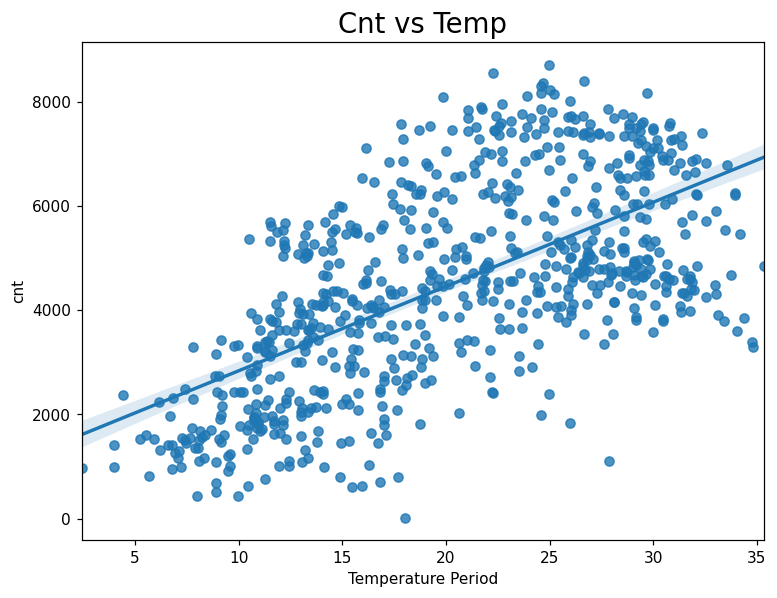

In [31]:
# Visualising the cnt vs temp 
plt.figure(figsize=(8,6),dpi=110)
plt.title("Cnt vs Temp",fontsize=18)
sns.regplot(data=bike_df,y="cnt",x="temp")
plt.xlabel("Temperature Period")
plt.show()

Inference : 
1) Demand for bike is positively corelated to the temparature. 

2) We can see clearly that cnt is increasing with temparature , which indicates the linear relationship.

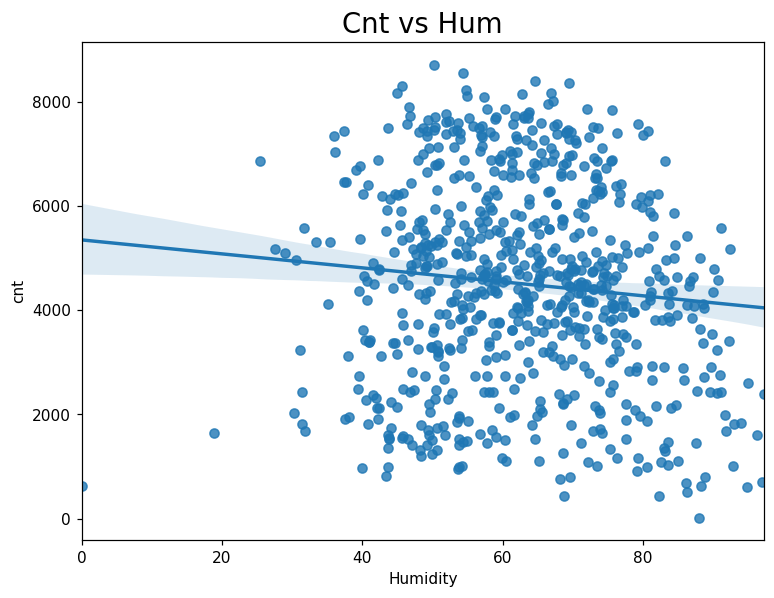

In [32]:
#  Visualising the cnt vs humidity
plt.figure(figsize=(8,6),dpi=110)
plt.title("Cnt vs Hum",fontsize=18)
sns.regplot(data=bike_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

Inference: 
1) We can see as the humidity increases the cnt decreases.

2) Humidity values are more scattered around.

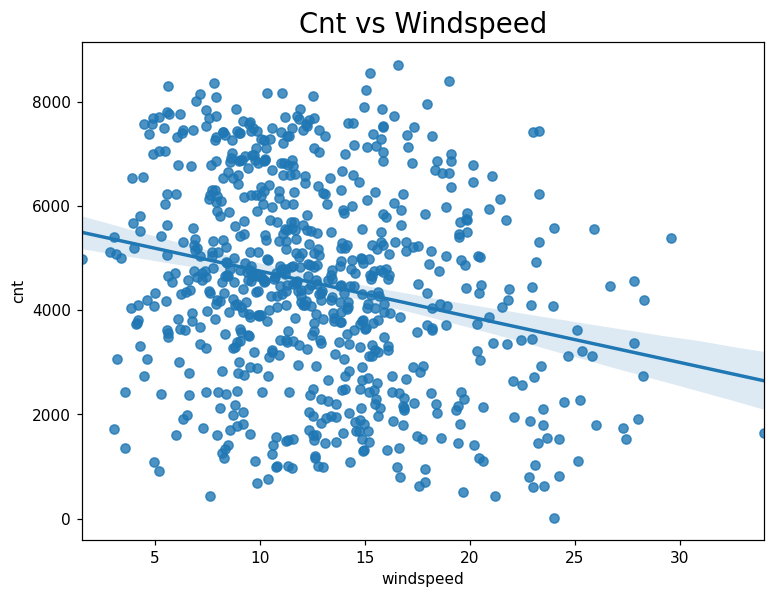

In [33]:
#Checking and visualizing the cnt vs windspeed 
plt.figure(figsize=(8,6),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=18)
sns.regplot(data=bike_df,y="cnt",x="windspeed")
plt.show()

Inference: 
1) We can see the inverse relation here , as the cnt is decreasing with the increase in the windspeed 

2) Here the windspeed values are much more scattered around. 

# Checking the Correlation Matrix using HeatMap

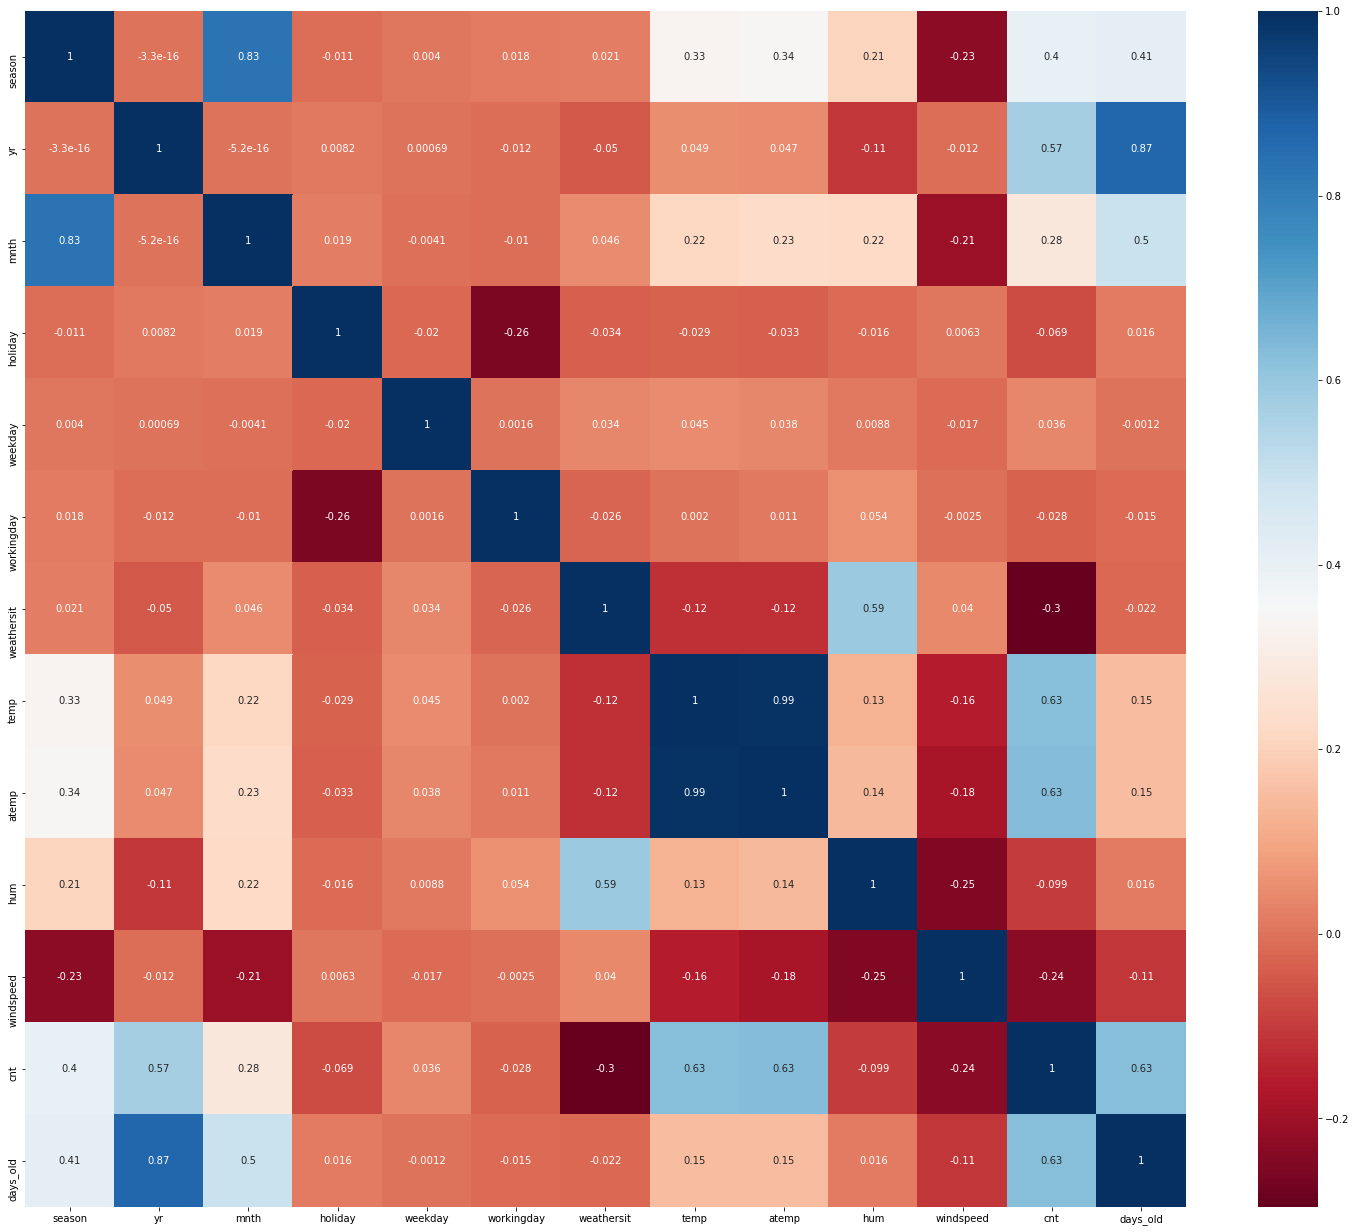

In [34]:
plt.figure(figsize = (26,22))
sns.heatmap(bike_df.corr(), annot = True, cmap="RdBu")
plt.show()

Insights : 
1) The above heatmap clearly shows the multicollinear nature of the variables and the variables with the high collinearity with the target variables. 

2) We will scale the this map building the linear model so that to validate the different correlated values. 

# 2.2 Rescaling the Feature 

In [35]:
scaler_model=MinMaxScaler()

In [36]:
# Inspecting the values before scaling 
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
653,4,1,10,0,3,1,1,19.201653,23.0423,55.8333,12.208807,7534,653
576,3,1,7,0,3,1,1,29.246653,33.1448,70.4167,11.083475,7216,576
426,1,1,3,0,0,0,2,16.980847,20.6746,62.1250,10.792293,4066,426
728,1,1,12,0,1,1,1,10.489153,11.5850,48.3333,23.500518,1796,728
482,2,1,4,0,0,0,2,15.443347,18.8752,48.9583,8.708325,4220,482


In [37]:
# Apply scaler to all the numeric variables

numeric_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[numeric_vars] = scaler_model.fit_transform(df_train[numeric_vars])

In [38]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2.517647,0.507843,6.549020,0.025490,2.950980,0.711765,1.401961,0.537262,0.512989,0.650369,0.320768,0.513620,367.941176
std,1.111947,0.500429,3.468714,0.157763,1.977166,0.453386,0.547540,0.225844,0.212385,0.145882,0.169797,0.224593,209.868619
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.339853,0.332086,0.538643,0.199179,0.356420,186.250000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,372.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.735215,0.688457,0.754830,0.414447,0.684710,552.750000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,728.000000


# 3.1 Building the Linear Model 

Dividing the X and Y sets for the model building 

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
from sklearn.feature_selection import RFE

In [41]:
# Using the Recursive Feature Elimination(RFE) and will be using the linear regression function for its compatibility with RFE. 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1)]

In [42]:
col_index = X_train.columns[rfe.support_]
col_index

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'days_old'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
#Checking the shape 
X_train_rfe.shape

(510,)

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'days_old'],
      dtype='object')

# 3.2 Building the linear regression model using the stats model 

# Model 1 

Doing the VIF check for the variables RFE 

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
import statsmodels.api as sm 

In [49]:
#Creating the model with all variables input in it 
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,days_old,2093.01
1,yr,788.02
2,mnth,606.51
8,atemp,350.56
7,temp,336.41
9,hum,27.09
0,season,23.87
6,weathersit,12.72
10,windspeed,3.94
5,workingday,3.61


In [50]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,days_old,2093.01
1,yr,788.02
2,mnth,606.51
8,atemp,350.56
7,temp,336.41
9,hum,27.09
0,season,23.87
6,weathersit,12.72
10,windspeed,3.94
5,workingday,3.61


# Model 2 

Removing the 'atemp' variable due to its high p-value and high VIF

In [51]:
X=X.drop('atemp',1)

In [52]:
#Adding the Conctant and fitting the model 
X_train_cm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_cm).fit()

In [53]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     181.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.31e-166
Time:                        21:18:50   Log-Likelihood:                 449.12
No. Observations:                 510   AIC:                            -874.2
Df Residuals:                     498   BIC:                            -823.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2599      0.031      8.301      0.000       0.198       0.321
season         0.0483      0.008      6.004      0.000       0.032       0.064
yr             0.3888      0.186      2.095      0.037       0.024       0.753
mnth           0.0114      0.016      0.734      0.463      -0.019       0.042
holiday       -0.1082      0.030     -3.643      0.000      -0.167      -0.050
weekday        0.0026      0.002      1.146      0.252      -0.002       0.007
workingday    -0.0195      0.010     -1.890      0.059      -0.040       0.001
weathersit    -0.0806      0.011     -7.576      0.000      -0.101      -0.060
temp           0.4722      0.022     21.362      0.000       0.429       0.516
hum           -0.0959      0.042     -2.294      0.022      -0.178      -0.014
windspeed     -0.1660      0.029     -5.791      0.000      -0.222      -0.110
days_old      -0.0004      0.001     -0.837      0.403      -0.001       0.001
==============================================================================
Omnibus:                       53.036   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.052
Skew:                          -0.587   Prob(JB):                     2.82e-25
Kurtosis:                       4.985   Cond. No.                     1.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,days_old,2078.63
1,yr,782.53
2,mnth,602.58
8,hum,26.54
0,season,23.84
6,weathersit,12.66
7,temp,7.85
9,windspeed,3.84
5,workingday,3.58
4,weekday,3.09


# Model 3 

Dropping the holiday as it has the high p-value 

In [55]:
X=X.drop('holiday',1)

In [56]:
#Adding the Conctant and fitting the model 
X_train_cm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_cm).fit()

In [57]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     193.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.57e-164
Time:                        21:18:50   Log-Likelihood:                 442.42
No. Observations:                 510   AIC:                            -862.8
Df Residuals:                     499   BIC:                            -816.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2474      0.032      7.854      0.000       0.186       0.309
season         0.0485      0.008      5.962      0.000       0.033       0.065
yr             0.3910      0.188      2.081      0.038       0.022       0.760
mnth           0.0113      0.016      0.715      0.475      -0.020       0.042
weekday        0.0026      0.002      1.111      0.267      -0.002       0.007
workingday    -0.0097      0.010     -0.962      0.337      -0.030       0.010
weathersit    -0.0775      0.011     -7.219      0.000      -0.099      -0.056
temp           0.4790      0.022     21.487      0.000       0.435       0.523
hum           -0.1008      0.042     -2.381      0.018      -0.184      -0.018
windspeed     -0.1683      0.029     -5.801      0.000      -0.225      -0.111
days_old      -0.0004      0.001     -0.838      0.403      -0.001       0.001
==============================================================================
Omnibus:                       58.752   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.510
Skew:                          -0.614   Prob(JB):                     1.38e-30
Kurtosis:                       5.228   Cond. No.                     1.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,days_old,2076.54
1,yr,781.70
2,mnth,601.76
7,hum,26.20
0,season,23.83
5,weathersit,12.57
6,temp,7.82
8,windspeed,3.80
4,workingday,3.37
3,weekday,3.09


# Model 4 

Working Day has the higher p-value of 0.220 and it is redudant to drop as the same information is been given by the day weekday variable. 

In [59]:
X=X.drop('workingday',1)

In [60]:
#Adding the Constant and fitting the model 
X_train_cm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_cm).fit()

In [61]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     214.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.65e-165
Time:                        21:18:51   Log-Likelihood:                 441.95
No. Observations:                 510   AIC:                            -863.9
Df Residuals:                     500   BIC:                            -821.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2414      0.031      7.821      0.000       0.181       0.302
season         0.0481      0.008      5.916      0.000       0.032       0.064
yr             0.3892      0.188      2.072      0.039       0.020       0.758
mnth           0.0113      0.016      0.714      0.476      -0.020       0.042
weekday        0.0025      0.002      1.096      0.274      -0.002       0.007
weathersit    -0.0765      0.011     -7.161      0.000      -0.098      -0.056
temp           0.4799      0.022     21.546      0.000       0.436       0.524
hum           -0.1037      0.042     -2.457      0.014      -0.187      -0.021
windspeed     -0.1689      0.029     -5.826      0.000      -0.226      -0.112
days_old      -0.0004      0.001     -0.828      0.408      -0.001       0.001
==============================================================================
Omnibus:                       55.789   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.990
Skew:                          -0.576   Prob(JB):                     8.02e-30
Kurtosis:                       5.231   Cond. No.                     1.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,days_old,2064.66
1,yr,776.98
2,mnth,599.22
6,hum,24.83
0,season,23.65
4,weathersit,12.43
5,temp,7.82
7,windspeed,3.71
3,weekday,3.08


# Model 5 

Temparature and Humidity are inveresly related to each other , so henceforth we have to drop any one variable.

In [63]:
X=X.drop('hum',1)

In [64]:
#Adding the Constant and fitting the model 
X_train_cm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_cm).fit()

In [65]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     238.4
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.06e-165
Time:                        21:18:51   Log-Likelihood:                 438.88
No. Observations:                 510   AIC:                            -859.8
Df Residuals:                     501   BIC:                            -821.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1964      0.025      7.860      0.000       0.147       0.246
season         0.0485      0.008      5.932      0.000       0.032       0.064
yr             0.4189      0.188      2.224      0.027       0.049       0.789
mnth           0.0129      0.016      0.816      0.415      -0.018       0.044
weekday        0.0025      0.002      1.082      0.280      -0.002       0.007
weathersit    -0.0927      0.008    -10.960      0.000      -0.109      -0.076
temp           0.4697      0.022     21.356      0.000       0.427       0.513
windspeed     -0.1482      0.028     -5.316      0.000      -0.203      -0.093
days_old      -0.0005      0.001     -0.973      0.331      -0.002       0.001
==============================================================================
Omnibus:                       54.068   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.330
Skew:                          -0.568   Prob(JB):                     3.70e-28
Kurtosis:                       5.158   Cond. No.                     1.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,days_old,2009.83
1,yr,755.98
2,mnth,580.23
0,season,23.48
5,temp,6.66
4,weathersit,6.10
6,windspeed,3.70
3,weekday,2.98


# Model 6 

Dropping the month variable column due to its high VIF value

In [67]:
X=X.drop('mnth',1)

In [68]:
#Adding the Constant and fitting the model 
X_train_cm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_cm).fit()

In [69]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     272.6
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.68e-166
Time:                        21:18:51   Log-Likelihood:                 438.55
No. Observations:                 510   AIC:                            -861.1
Df Residuals:                     502   BIC:                            -827.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2035      0.023      8.677      0.000       0.157       0.250
season         0.0490      0.008      6.024      0.000       0.033       0.065
yr             0.2674      0.031      8.604      0.000       0.206       0.328
weekday        0.0025      0.002      1.063      0.288      -0.002       0.007
weathersit    -0.0923      0.008    -10.936      0.000      -0.109      -0.076
temp           0.4702      0.022     21.388      0.000       0.427       0.513
windspeed     -0.1487      0.028     -5.338      0.000      -0.203      -0.094
days_old   -8.635e-05   8.24e-05     -1.048      0.295      -0.000    7.56e-05
==============================================================================
Omnibus:                       56.115   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.747
Skew:                          -0.587   Prob(JB):                     2.46e-29
Kurtosis:                       5.196   Cond. No.                     3.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,days_old,58.30
1,yr,23.36
0,season,22.92
4,temp,6.44
3,weathersit,5.71
5,windspeed,3.58
2,weekday,2.96


# 4.1 Model Evaluation 

Residual Analysis of the Model 

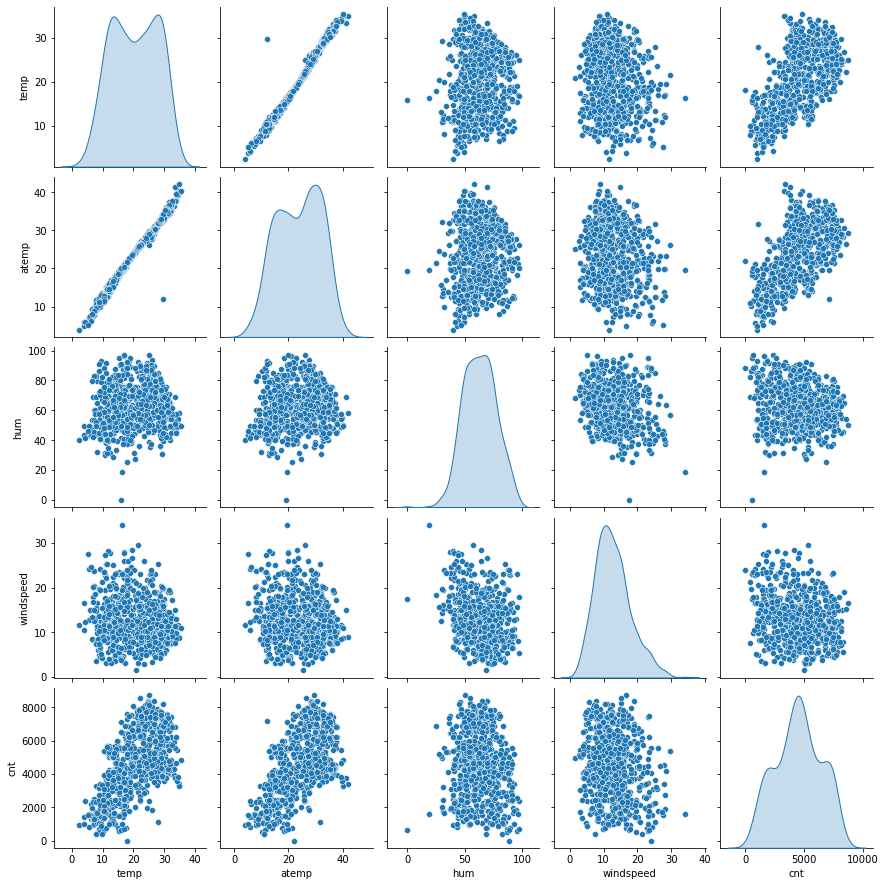

In [71]:
bike_df=bike_df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_df, diag_kind='kde')
plt.show()

In [72]:
#Checking the Multicollinearity between predictor variables 
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,days_old,58.30
1,yr,23.36
0,season,22.92
4,temp,6.44
3,weathersit,5.71
5,windspeed,3.58
2,weekday,2.96


# 4.2 Making predictions using the final model and Residual Analysis 

In [73]:
y_train_pred = lr_6.predict(X_train_cm)

In [74]:
# We have our predicted scores now, and thus we can take the residuals
res=y_train-y_train_pred

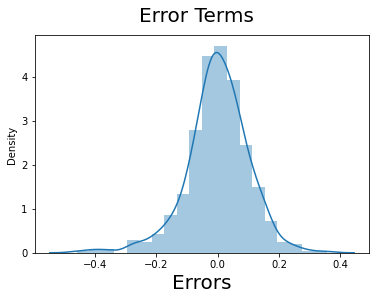

In [75]:
#Knowing the error term of the distribution
fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=20)
plt.show()

We can see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

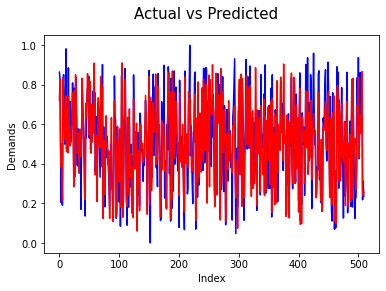

In [76]:
#Actusl vs Predicted Model
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

The actual and predicted model follows the same pattern which means model is good. 

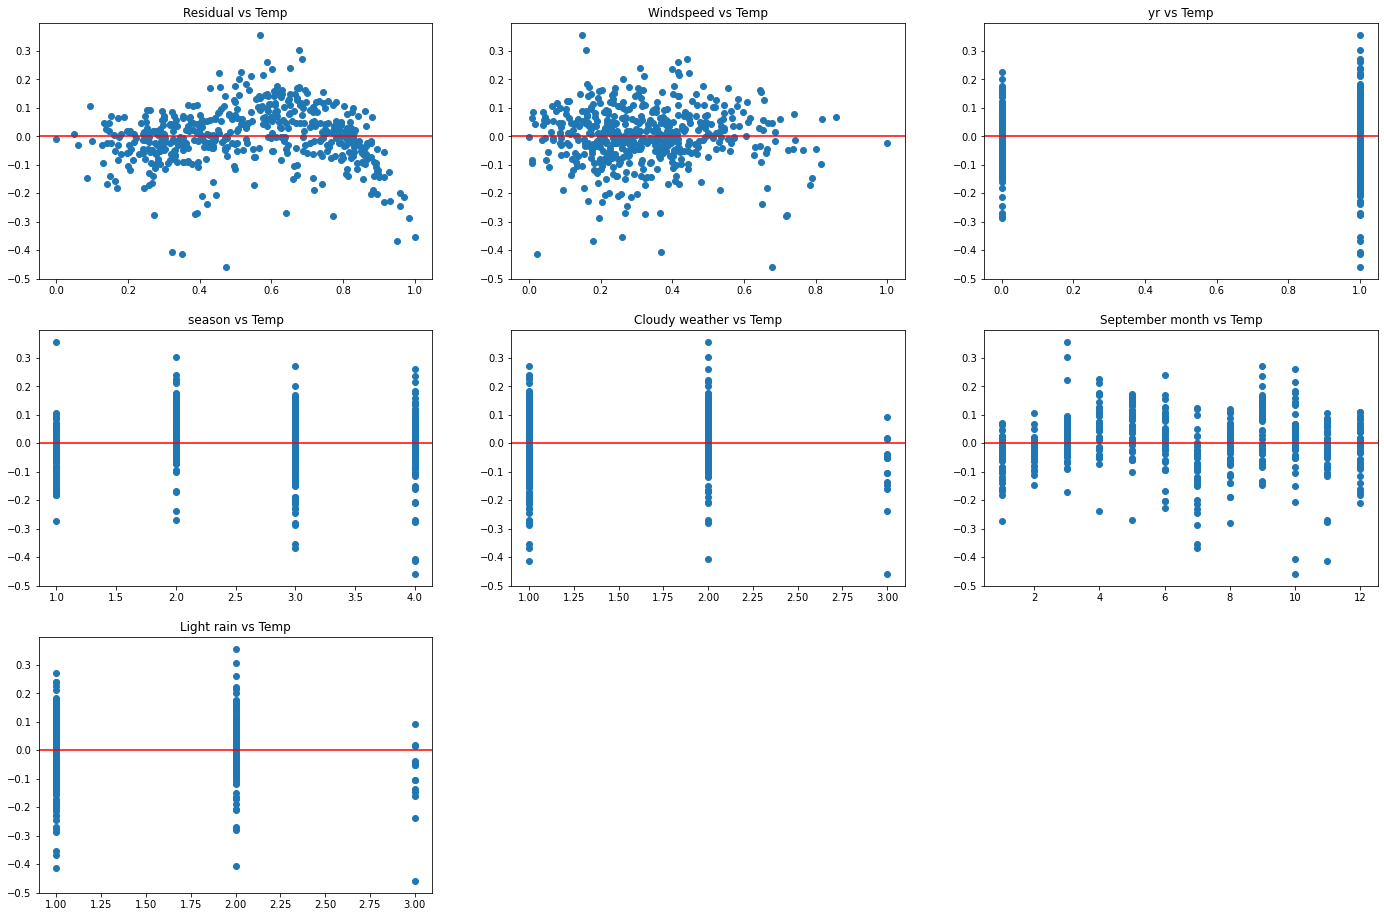

In [77]:
# Scatter Plot for all the residuals. Mostly all the means are being centered at 0

plt.figure(figsize=(24, 16))
plt.subplot(3,3,1)
plt.scatter(X_train['temp'],res)
plt.title("Residual vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,2)
plt.scatter(X_train['windspeed'],res)
plt.title("Windspeed vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,3)
plt.scatter(X_train['yr'],res)
plt.title("yr vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,4)
plt.scatter(X_train['season'],res)
plt.title("season vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,5)
plt.scatter(X_train['weathersit'],res)
plt.title("Cloudy weather vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,6)
plt.scatter(X_train['mnth'],res)
plt.title("September month vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,7)
plt.scatter(X_train['weathersit'],res)
plt.title("Light rain vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [78]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler_model.transform(df_test[num_vars])
df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
184,3,0,7,1,3,0,2,0.831783,0.769660,0.657364,0.084219,0.692706,184
535,2,1,6,0,4,1,1,0.901354,0.842587,0.610133,0.153728,0.712034,535
299,4,0,10,0,6,0,2,0.511964,0.496145,0.837699,0.334206,0.303382,299
221,3,0,8,0,5,1,1,0.881625,0.795343,0.437098,0.339570,0.547400,221
152,2,0,6,0,6,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,152


In [79]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2.456621,0.479452,6.474886,0.036530,3.100457,0.639269,1.374429,0.558941,0.532991,0.638508,0.313350,0.520592,355.776256
std,1.109463,0.500722,3.421875,0.188034,2.058536,0.481313,0.538843,0.233698,0.217888,0.148974,0.159947,0.218435,213.665198
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,3.000000
25%,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.354650,0.344751,0.527265,0.198517,0.377531,170.000000
50%,2.000000,0.000000,6.000000,0.000000,3.000000,1.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,348.000000
75%,3.000000,1.000000,9.000000,0.000000,5.000000,1.000000,2.000000,0.759096,0.714132,0.743928,0.403048,0.672745,536.500000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.984424,0.980934,1.002146,0.807474,0.963300,729.000000


In [80]:
# Dividing into X test and y test 
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      219 non-null    int64  
 1   yr          219 non-null    int64  
 2   mnth        219 non-null    int64  
 3   holiday     219 non-null    int64  
 4   weekday     219 non-null    int64  
 5   workingday  219 non-null    int64  
 6   weathersit  219 non-null    int64  
 7   temp        219 non-null    float64
 8   atemp       219 non-null    float64
 9   hum         219 non-null    float64
 10  windspeed   219 non-null    float64
 11  days_old    219 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 22.2 KB


In [81]:
col1=X.columns
X_test=X_test[col1]
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   season      219 non-null    int64  
 2   yr          219 non-null    int64  
 3   weekday     219 non-null    int64  
 4   weathersit  219 non-null    int64  
 5   temp        219 non-null    float64
 6   windspeed   219 non-null    float64
 7   days_old    219 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 15.4 KB


In [82]:
y_pred = lr_6.predict(X_test_lm6)

# 4.3 R2 value Test 

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.775969011632838

In [84]:
r2=0.8203092200749708

In [85]:
# Checking the shape for X_test 
X_test.shape

(219, 7)

In [86]:
# We are finding the asjusted r-square using the formula and n is been defined as the number of rows within X 
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8143479145798276

# Final Interpretation of the Model 

Insights: 
1) It is advisable for the Company to focus on expanding its bussiness during the spring season as the sales and booking are quite high due to clear weather. 

2) The most important months we have seen 5,6,7,8 and 9 where the companies should focus on the expansion of the business. 

3) During the working day the sales have got much higher as compared to the weekends and it has the huge drastic difference. 

4) A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2308 units, this shows upcoming year as the good predictor for the increase in sales. 

5) Less bookings would occured during light snow and rain this time can be utilized for serving the bikes which would have its impact on the business. 